# Import Python Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns
sns.set()

import tensorflow as tf
import keras

from keras import regularizers, optimizers
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler

E:\Python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Import Fashion MNIST data set

In [2]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST data set

In [3]:
(trainImages, trainLabels), (testImages, testLabels) = fashion_mnist.load_data()

# Train and test images

In [4]:
print('Train images dimension : \n', trainImages.shape, '\n\n')
print('Test images dimension : \n', testImages.shape, '\n\n')

Train images dimension : 
 (60000, 28, 28) 


Test images dimension : 
 (10000, 28, 28) 




# Train and test labels

In [5]:
print('Train labels dimension : \n', trainLabels.shape, '\n\n')
print('Test labels dimension : \n', testLabels.shape, '\n\n')

Train labels dimension : 
 (60000,) 


Test labels dimension : 
 (10000,) 




###### First train label

In [6]:
print('Train labels : \n', trainLabels, '\n\n')

Train labels : 
 [9 0 0 ... 3 0 5] 




###### Properties of the 1st image on the training set

In [7]:
print('The 1st image on the training set as a 28 by 28 matrix : \n\n', trainImages[0], '\n')
print('The dimension of the 1st image on the training set : \n', trainImages[0].shape, '\n')
print('The type of the 1st image on the training set : \n', type(trainImages[0]), '\n')

The 1st image on the training set as a 28 by 28 matrix : 

 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  

# Define the class names

In [8]:
classNames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###### Display the 1st image on the training set

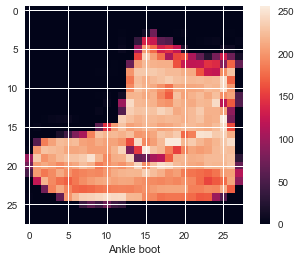

In [9]:
plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.show()

# Normalize the data to the interval (0,1)

In [10]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0

###### Display the 1st image on the training set after normalization

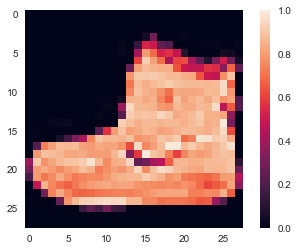

In [11]:
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.grid(False)
plt.show()

###### Display the first 10 images on the test data set

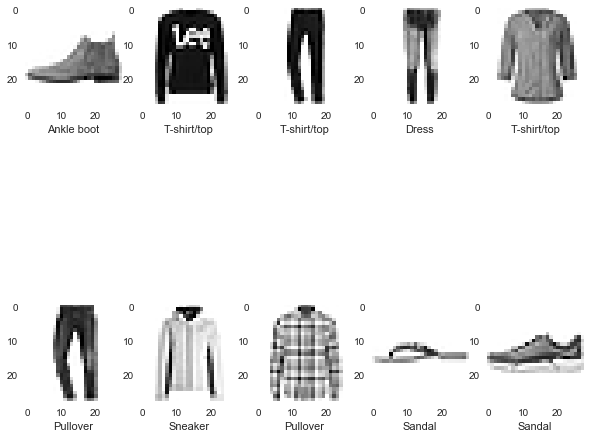

In [12]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.grid(False)
    plt.xlabel(classNames[trainLabels[i]])
    plt.imshow(testImages[i], cmap=plt.cm.binary)
plt.show()

# One hot encoding for the train and test labels

In [13]:
trainLabels_one_hot = to_categorical(trainLabels, 10)
testLabels_one_hot = to_categorical(testLabels, 10)

print('The 1st train label : \n', trainLabels_one_hot[55], '\n\n')
print('The 1st test label : \n', testLabels_one_hot[55], '\n\n')

The 1st train label : 
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 


The 1st test label : 
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 




# Optimization parameters

In [14]:
epochs = 50
learningRate = 1e-2
momentum = 0.0
batchSize = 50

# Build the Keras model with compile

In [15]:
def buildModel_DNN(dropout_rate=0.0, decay_rate=0.0):
    
    model_fash = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(50, activation = tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)),
        Dropout(dropout_rate),
        Dense(50, activation = tf.nn.relu, kernel_regularizer=regularizers.l2(0.001)),
        Dropout(dropout_rate),
        Dense(10, activation = tf.nn.softmax, kernel_regularizer=regularizers.l1(0.01))
    ])
    
    DNN_optimizer = optimizers.SGD(lr=learningRate, momentum=momentum, nesterov=True, decay=decay_rate)
    
    model_fash.compile(loss='binary_crossentropy', optimizer=DNN_optimizer, metrics=['accuracy', 'mean_squared_error'])
    
    return model_fash

###### Model properties

In [16]:
DNN_model = buildModel_DNN()
print(DNN_model.summary(), '\n\n')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
None 


# Model fitting

In [17]:
history_fash = DNN_model.fit(trainImages, trainLabels_one_hot, epochs=epochs, batch_size=batchSize, validation_data=(testImages, testLabels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 44us/step - loss: 1.6089 - acc: 0.9009 - mean_squared_error: 0.0816 - val_loss: 1.2243 - val_acc: 0.9030 - val_mean_squared_error: 0.0764
Epoch 2/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.9761 - acc: 0.9039 - mean_squared_error: 0.0750 - val_loss: 0.7808 - val_acc: 0.9047 - val_mean_squared_error: 0.0747
Epoch 3/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.6724 - acc: 0.9053 - mean_squared_error: 0.0747 - val_loss: 0.5921 - val_acc: 0.9066 - val_mean_squared_error: 0.0745
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.5399 - acc: 0.9087 - mean_squared_error: 0.0734 - val_loss: 0.4959 - val_acc: 0.9104 - val_mean_squared_error: 0.0723
Epoch 5/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.4628 - acc: 0.9114 - mean_squared_error: 0.0708 - val_loss: 0.4345 - val_

Epoch 42/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.2654 - acc: 0.9340 - mean_squared_error: 0.0467 - val_loss: 0.2661 - val_acc: 0.9333 - val_mean_squared_error: 0.0470
Epoch 43/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2649 - acc: 0.9340 - mean_squared_error: 0.0466 - val_loss: 0.2656 - val_acc: 0.9335 - val_mean_squared_error: 0.0469
Epoch 44/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2644 - acc: 0.9341 - mean_squared_error: 0.0466 - val_loss: 0.2650 - val_acc: 0.9341 - val_mean_squared_error: 0.0468
Epoch 45/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2639 - acc: 0.9344 - mean_squared_error: 0.0465 - val_loss: 0.2646 - val_acc: 0.9339 - val_mean_squared_error: 0.0468
Epoch 46/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2635 - acc: 0.9346 - mean_squared_error: 0.0464 - val_loss: 0.2642 - val_acc: 0.9343 - val_mean_squared_error: 0.0467


###### Print values returned by history variable

In [18]:
print(history_fash.history.keys(), '\n\n')

dict_keys(['val_loss', 'val_acc', 'val_mean_squared_error', 'loss', 'acc', 'mean_squared_error']) 




###### Accuracy plot on training vs. test data

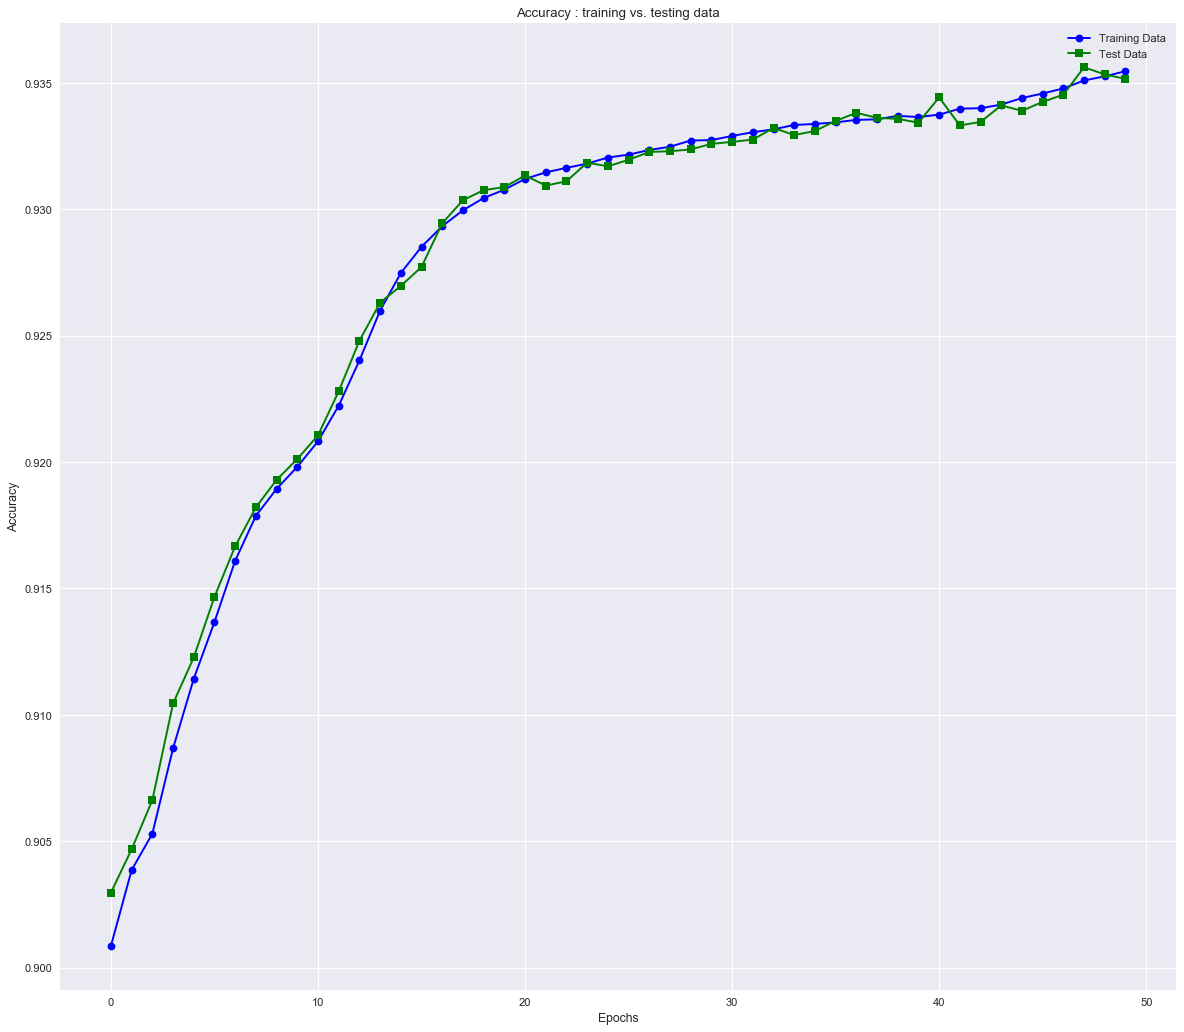

In [19]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.plot(history_fash.history['acc'], 'bo-', label = 'Training Data')
plt.plot(history_fash.history['val_acc'], 'gs-', label = 'Test Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy : training vs. testing data')
plt.legend()
plt.show()

###### Loss plot on training vs. test data

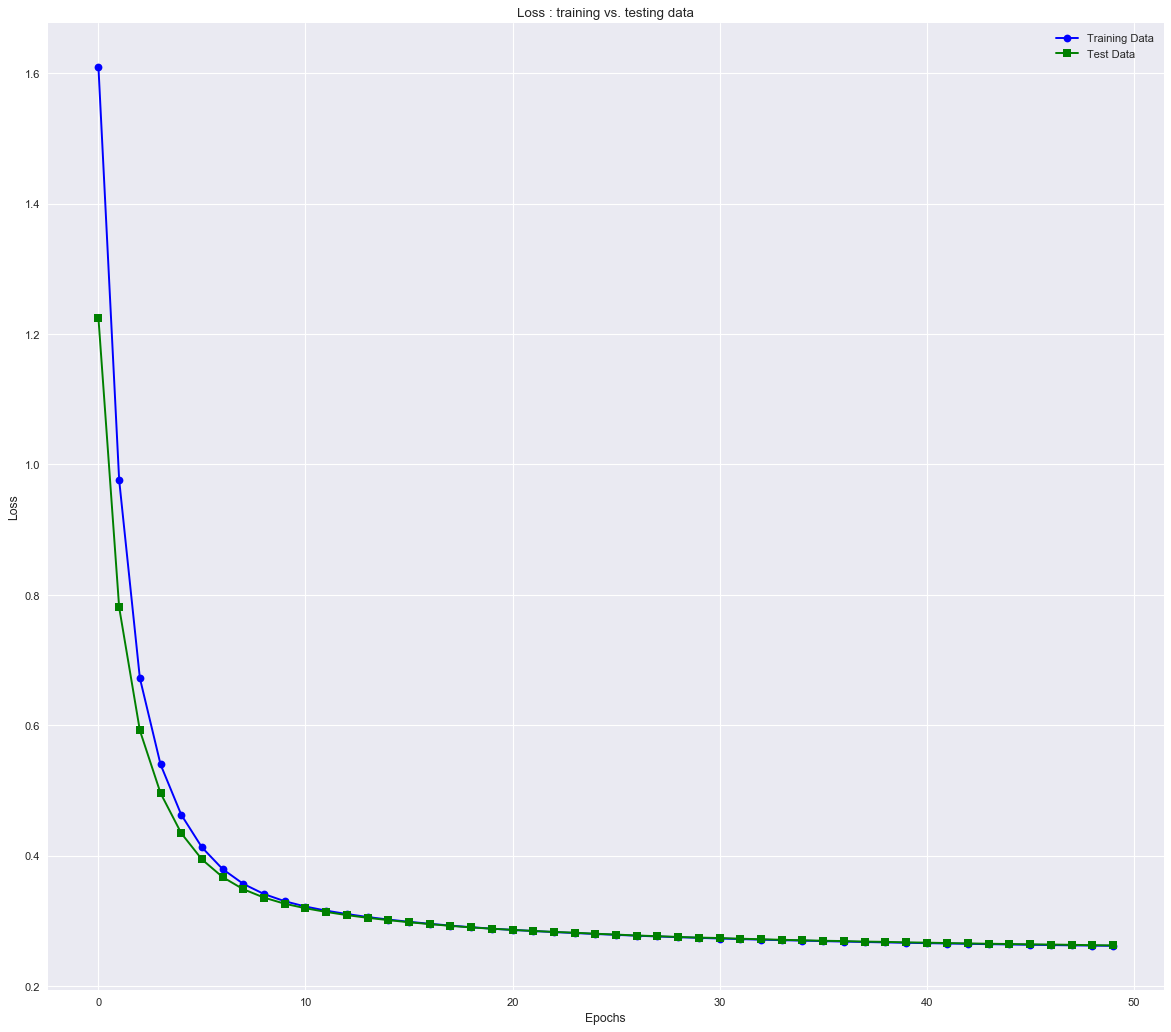

In [20]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.plot(history_fash.history['loss'], 'bo-', label = 'Training Data')
plt.plot(history_fash.history['val_loss'], 'gs-', label = 'Test Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss : training vs. testing data')
plt.legend()
plt.show()

###### Values returned by model metrics

In [21]:
print(DNN_model.metrics_names)

['loss', 'acc', 'mean_squared_error']


# Evaluate the model performance

In [22]:
scores = DNN_model.evaluate(testImages, testLabels_one_hot, verbose=False)
print('Model metrics : ', DNN_model.metrics_names, '\n')

print(DNN_model.metrics_names[0] + ' score :', scores[0], '\n')
print(DNN_model.metrics_names[1] + ' score :', scores[1] * 100, '\n')

Model metrics :  ['loss', 'acc', 'mean_squared_error'] 

loss score : 0.2625449209213257 

acc score : 93.51599926948548 



# Model predictions

In [23]:
DNN_predictions = DNN_model.predict(testImages)
print('Predictions variable dimension : \n', DNN_predictions.shape, '\n\n')

print('The prediction for the 1st image : \n', DNN_predictions[0], '\n\n')

print('The class predicted for the 1st image : \n', np.argmax(DNN_predictions[0]), '\n')
print('The true class for the 1st image : \n', testLabels[0], '\n')

Predictions variable dimension : 
 (10000, 10) 


The prediction for the 1st image : 
 [1.27687308e-04 3.01545742e-03 1.03334244e-02 7.95796514e-03
 8.36949144e-03 2.26022035e-01 1.22672934e-02 2.44496778e-01
 1.06193416e-01 3.81216466e-01] 


The class predicted for the 1st image : 
 9 

The true class for the 1st image : 
 9 



###### Prediction error

E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


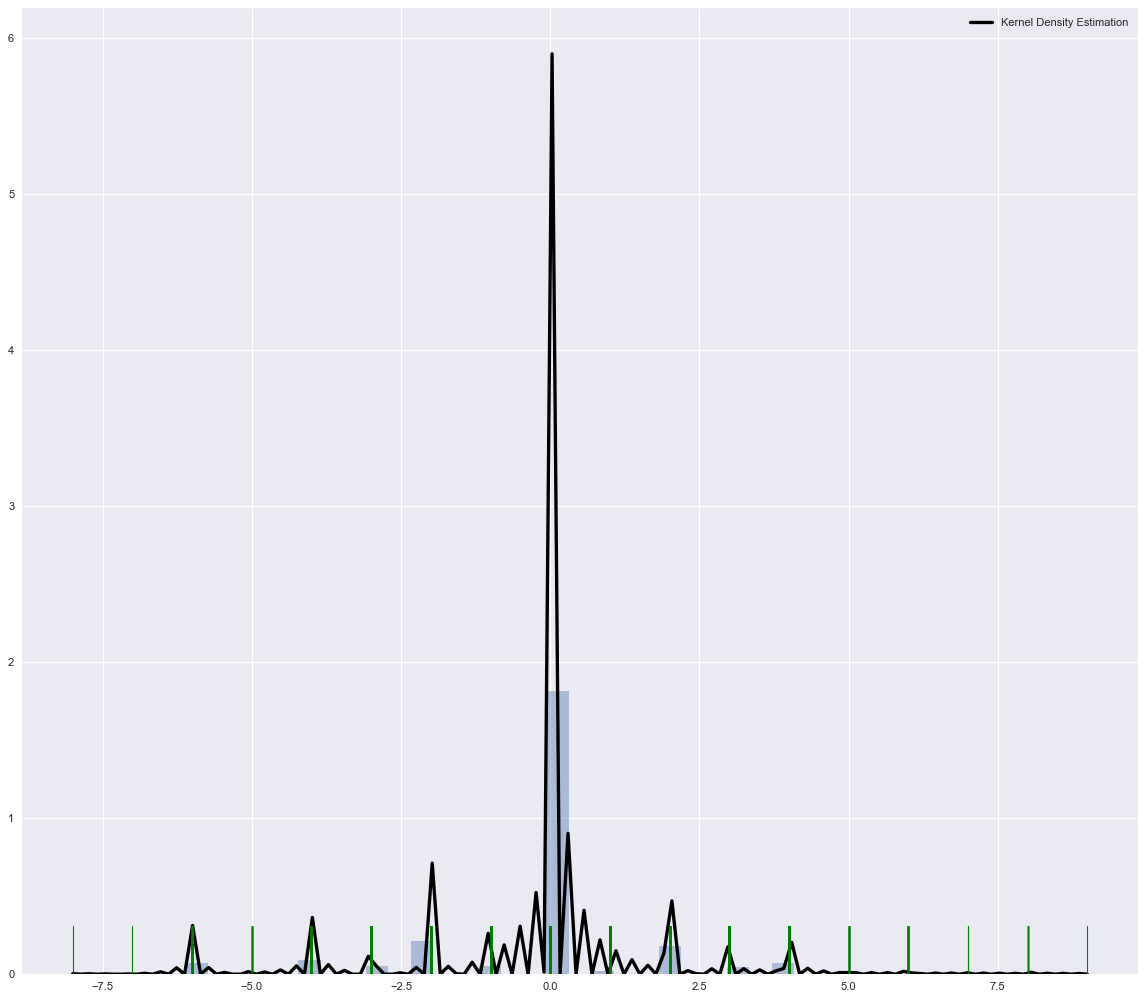

In [24]:
errorPredictions = np.argmax(DNN_predictions, axis=1) - testLabels

plt.figure(figsize=(18, 16), dpi= 80)
sns.distplot(errorPredictions, bins=45, rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "Kernel Density Estimation"})
plt.show()

###### Prediction plot on a random chosen image

Choose an image from the test data set : 
144


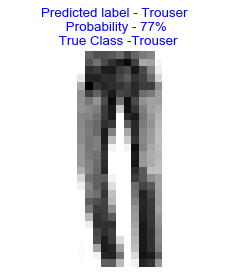

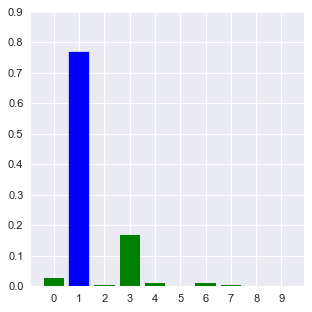

In [25]:
print('Choose an image from the test data set : ')
i = int(input())

predictedLabel_image = np.argmax(DNN_predictions[i])
predictedProbability_image = 100 * np.max(DNN_predictions[i])

if predictedLabel_image == testLabels[i]:
    color = 'blue'
else:
    color = 'red'



plt.figure(figsize=(3, 6), dpi= 80)
plt.imshow(testImages[i], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Predicted label - {} \n Probability - {:2.0f}% \n True Class -{}'.format(classNames[predictedLabel_image], predictedProbability_image, classNames[testLabels[i]] ), color=color)
plt.tight_layout()
plt.show()


plt.figure(figsize=(4, 4), dpi= 80)
currentPlot_image = plt.bar(range(10), DNN_predictions[i], color='green')
currentPlot_image[predictedLabel_image].set_color('red')
currentPlot_image[testLabels[i]].set_color('blue')
plt.xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.tight_layout()
plt.show()

# Dropout regularization with 50 epochs for each model

In [26]:
val_dropout = [1, 2, 3, 4, 5, 6, 7, 8, 9]
loss_dropout = []
acc_dropout = []

for i in val_dropout:
    dropout_rate = i/10
    
    DNN_model = buildModel_DNN(dropout_rate=dropout_rate, decay_rate=0.0)
    history_fash = DNN_model.fit(trainImages, trainLabels_one_hot, epochs=epochs, batch_size=batchSize, validation_data=(testImages, testLabels_one_hot))
    scores = DNN_model.evaluate(testImages, testLabels_one_hot, verbose=False)
    
    loss_dropout.append(scores[0])
    acc_dropout.append(scores[1])
    
    print('\n\n Dropout rate ', dropout_rate, ' finished \n\n\n')


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 54us/step - loss: 1.6324 - acc: 0.9001 - mean_squared_error: 0.0825 - val_loss: 1.2324 - val_acc: 0.9000 - val_mean_squared_error: 0.0765
Epoch 2/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.9800 - acc: 0.9017 - mean_squared_error: 0.0758 - val_loss: 0.7801 - val_acc: 0.9013 - val_mean_squared_error: 0.0747
Epoch 3/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.6774 - acc: 0.9027 - mean_squared_error: 0.0755 - val_loss: 0.5955 - val_acc: 0.9023 - val_mean_squared_error: 0.0748
Epoch 4/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.5465 - acc: 0.9041 - mean_squared_error: 0.0748 - val_loss: 0.4991 - val_acc: 0.9042 - val_mean_squared_error: 0.0728
Epoch 5/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.4708 - acc: 0.9078 - mean_squared_error: 0.0728 - val_loss: 0.4391 - val_

Epoch 42/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2903 - acc: 0.9257 - mean_squared_error: 0.0566 - val_loss: 0.2780 - val_acc: 0.9279 - val_mean_squared_error: 0.0530
Epoch 43/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.2894 - acc: 0.9259 - mean_squared_error: 0.0564 - val_loss: 0.2777 - val_acc: 0.9274 - val_mean_squared_error: 0.0530
Epoch 44/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2892 - acc: 0.9259 - mean_squared_error: 0.0564 - val_loss: 0.2771 - val_acc: 0.9281 - val_mean_squared_error: 0.0529
Epoch 45/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2890 - acc: 0.9260 - mean_squared_error: 0.0564 - val_loss: 0.2764 - val_acc: 0.9282 - val_mean_squared_error: 0.0527
Epoch 46/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.2879 - acc: 0.9265 - mean_squared_error: 0.0561 - val_loss: 0.2759 - val_acc: 0.9288 - val_mean_squared_error: 0.0525


60000/60000 [==============================] - 2s 40us/step - loss: 0.3198 - acc: 0.9077 - mean_squared_error: 0.0779 - val_loss: 0.3099 - val_acc: 0.9063 - val_mean_squared_error: 0.0755
Epoch 33/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3189 - acc: 0.9080 - mean_squared_error: 0.0778 - val_loss: 0.3089 - val_acc: 0.9066 - val_mean_squared_error: 0.0753
Epoch 34/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.3183 - acc: 0.9082 - mean_squared_error: 0.0777 - val_loss: 0.3084 - val_acc: 0.9063 - val_mean_squared_error: 0.0753
Epoch 35/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3177 - acc: 0.9084 - mean_squared_error: 0.0777 - val_loss: 0.3075 - val_acc: 0.9068 - val_mean_squared_error: 0.0752
Epoch 36/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.3172 - acc: 0.9085 - mean_squared_error: 0.0776 - val_loss: 0.3068 - val_acc: 0.9071 - val_mean_squared_error: 0.0751
Epoch 37/50


Epoch 23/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3297 - acc: 0.9031 - mean_squared_error: 0.0806 - val_loss: 0.3219 - val_acc: 0.9053 - val_mean_squared_error: 0.0785
Epoch 24/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3284 - acc: 0.9032 - mean_squared_error: 0.0804 - val_loss: 0.3204 - val_acc: 0.9054 - val_mean_squared_error: 0.0782
Epoch 25/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3271 - acc: 0.9032 - mean_squared_error: 0.0801 - val_loss: 0.3189 - val_acc: 0.9055 - val_mean_squared_error: 0.0779
Epoch 26/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3258 - acc: 0.9033 - mean_squared_error: 0.0799 - val_loss: 0.3174 - val_acc: 0.9058 - val_mean_squared_error: 0.0776
Epoch 27/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3247 - acc: 0.9034 - mean_squared_error: 0.0797 - val_loss: 0.3161 - val_acc: 0.9058 - val_mean_squared_error: 0.0774


60000/60000 [==============================] - 2s 40us/step - loss: 0.3559 - acc: 0.9000 - mean_squared_error: 0.0893 - val_loss: 0.3538 - val_acc: 0.9000 - val_mean_squared_error: 0.0890
Epoch 14/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3535 - acc: 0.9000 - mean_squared_error: 0.0891 - val_loss: 0.3513 - val_acc: 0.9000 - val_mean_squared_error: 0.0888
Epoch 15/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3514 - acc: 0.9000 - mean_squared_error: 0.0890 - val_loss: 0.3490 - val_acc: 0.9000 - val_mean_squared_error: 0.0885
Epoch 16/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3495 - acc: 0.9000 - mean_squared_error: 0.0888 - val_loss: 0.3468 - val_acc: 0.9000 - val_mean_squared_error: 0.0883
Epoch 17/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3478 - acc: 0.9000 - mean_squared_error: 0.0886 - val_loss: 0.3448 - val_acc: 0.9000 - val_mean_squared_error: 0.0881
Epoch 18/50


60000/60000 [==============================] - 2s 41us/step - loss: 0.6723 - acc: 0.9001 - mean_squared_error: 0.0869 - val_loss: 0.5956 - val_acc: 0.9000 - val_mean_squared_error: 0.0874
Epoch 4/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.5485 - acc: 0.9001 - mean_squared_error: 0.0878 - val_loss: 0.5064 - val_acc: 0.9000 - val_mean_squared_error: 0.0878
Epoch 5/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.4776 - acc: 0.9003 - mean_squared_error: 0.0878 - val_loss: 0.4507 - val_acc: 0.9000 - val_mean_squared_error: 0.0877
Epoch 6/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.4327 - acc: 0.9004 - mean_squared_error: 0.0875 - val_loss: 0.4151 - val_acc: 0.9000 - val_mean_squared_error: 0.0873
Epoch 7/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.4044 - acc: 0.9005 - mean_squared_error: 0.0872 - val_loss: 0.3920 - val_acc: 0.9000 - val_mean_squared_error: 0.0869
Epoch 8/50
60000

60000/60000 [==============================] - 3s 42us/step - loss: 0.3281 - acc: 0.9047 - mean_squared_error: 0.0839 - val_loss: 0.3218 - val_acc: 0.9000 - val_mean_squared_error: 0.0830
Epoch 45/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3276 - acc: 0.9049 - mean_squared_error: 0.0838 - val_loss: 0.3215 - val_acc: 0.9000 - val_mean_squared_error: 0.0830
Epoch 46/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3267 - acc: 0.9050 - mean_squared_error: 0.0836 - val_loss: 0.3210 - val_acc: 0.9000 - val_mean_squared_error: 0.0829
Epoch 47/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3271 - acc: 0.9048 - mean_squared_error: 0.0838 - val_loss: 0.3209 - val_acc: 0.9000 - val_mean_squared_error: 0.0829
Epoch 48/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3265 - acc: 0.9048 - mean_squared_error: 0.0837 - val_loss: 0.3202 - val_acc: 0.9000 - val_mean_squared_error: 0.0827
Epoch 49/50


Epoch 35/50
60000/60000 [==============================] - 2s 42us/step - loss: 0.3325 - acc: 0.9057 - mean_squared_error: 0.0826 - val_loss: 0.3251 - val_acc: 0.9034 - val_mean_squared_error: 0.0808
Epoch 36/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3325 - acc: 0.9055 - mean_squared_error: 0.0827 - val_loss: 0.3250 - val_acc: 0.9036 - val_mean_squared_error: 0.0810
Epoch 37/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3314 - acc: 0.9058 - mean_squared_error: 0.0825 - val_loss: 0.3244 - val_acc: 0.9036 - val_mean_squared_error: 0.0809
Epoch 38/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3311 - acc: 0.9058 - mean_squared_error: 0.0826 - val_loss: 0.3238 - val_acc: 0.9035 - val_mean_squared_error: 0.0808
Epoch 39/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.3307 - acc: 0.9059 - mean_squared_error: 0.0825 - val_loss: 0.3234 - val_acc: 0.9035 - val_mean_squared_error: 0.0808


60000/60000 [==============================] - 2s 41us/step - loss: 0.3410 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3406 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 26/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.3403 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3399 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 27/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3396 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3393 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 28/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3389 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3386 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 29/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3383 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3380 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 30/50


Epoch 16/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3491 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3484 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 17/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3478 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3472 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 18/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3466 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3461 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 19/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.3455 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3450 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 20/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.3445 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3441 - val_acc: 0.9000 - val_mean_squared_error: 0.0900


60000/60000 [==============================] - 3s 42us/step - loss: 0.4315 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.4156 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 7/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.4039 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3938 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 8/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.3862 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3797 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 9/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.3747 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3704 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 10/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3671 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3641 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 11/50
600

60000/60000 [==============================] - 3s 43us/step - loss: 0.3307 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3306 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 48/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3305 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3303 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 49/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3302 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3301 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 50/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3300 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3299 - val_acc: 0.9000 - val_mean_squared_error: 0.0900


 Dropout rate  0.9  finished 





###### Dropout representation

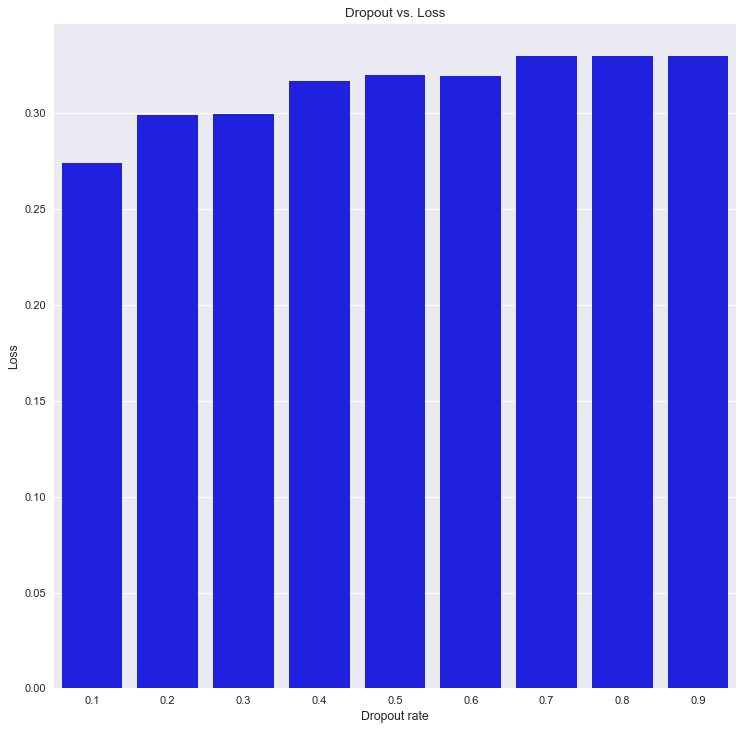

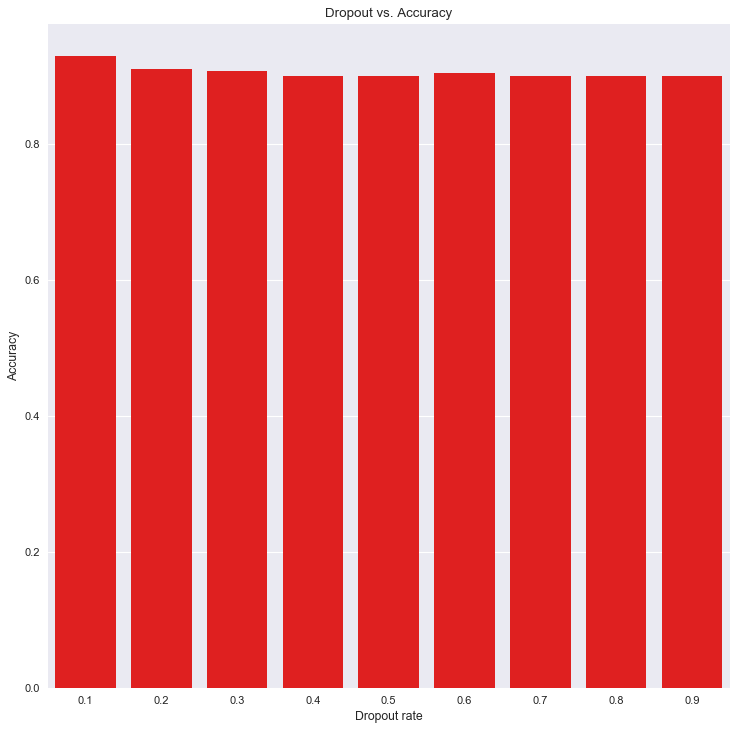

In [27]:
plt.figure(figsize=(11, 11), dpi= 80)
sns.barplot(np.array(val_dropout)/(10), loss_dropout, color='blue')
plt.xlabel('Dropout rate')
plt.ylabel('Loss')
plt.title('Dropout vs. Loss')
plt.show()

plt.figure(figsize=(11, 11), dpi= 80)
sns.barplot(np.array(val_dropout)/(10), acc_dropout, color='red')
plt.xlabel('Dropout rate')
plt.ylabel('Accuracy')
plt.title('Dropout vs. Accuracy')
plt.show()

# Decay stepsize with dropout 0.2

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/step - loss: 1.6608 - acc: 0.8988 - mean_squared_error: 0.0912 - val_loss: 1.3048 - val_acc: 0.9000 - val_mean_squared_error: 0.0899
Epoch 2/50
60000/60000 [==============================] - 3s 44us/step - loss: 1.0801 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.8990 - val_acc: 0.9000 - val_mean_squared_error: 0.0899
Epoch 3/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.7862 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.6979 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 4/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.6497 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.6127 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 5/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.5855 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.5611 - val_

Epoch 42/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3629 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3627 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 43/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3624 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3622 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 44/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.3620 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3618 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 45/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.3616 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3614 - val_acc: 0.9000 - val_mean_squared_error: 0.0900
Epoch 46/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3612 - acc: 0.9000 - mean_squared_error: 0.0900 - val_loss: 0.3610 - val_acc: 0.9000 - val_mean_squared_error: 0.0900


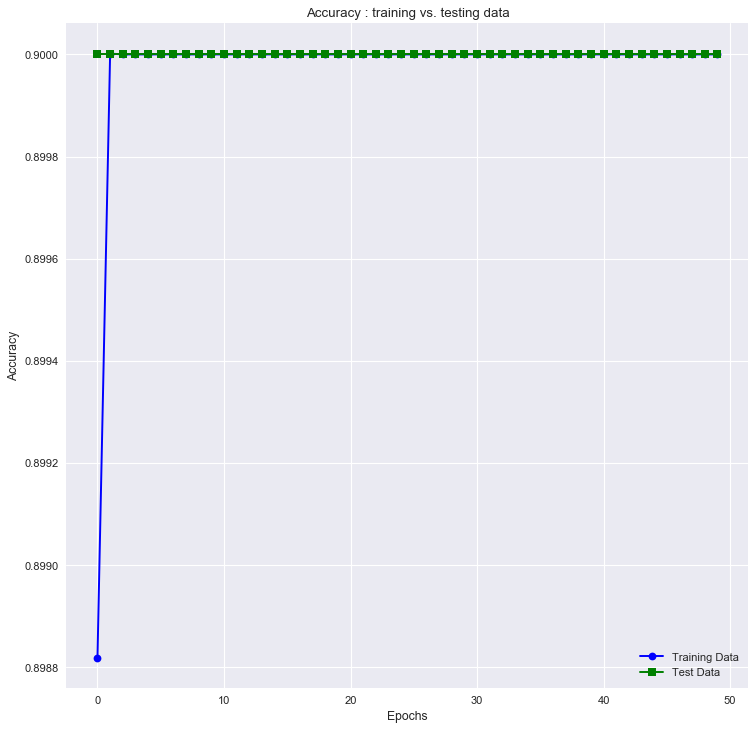

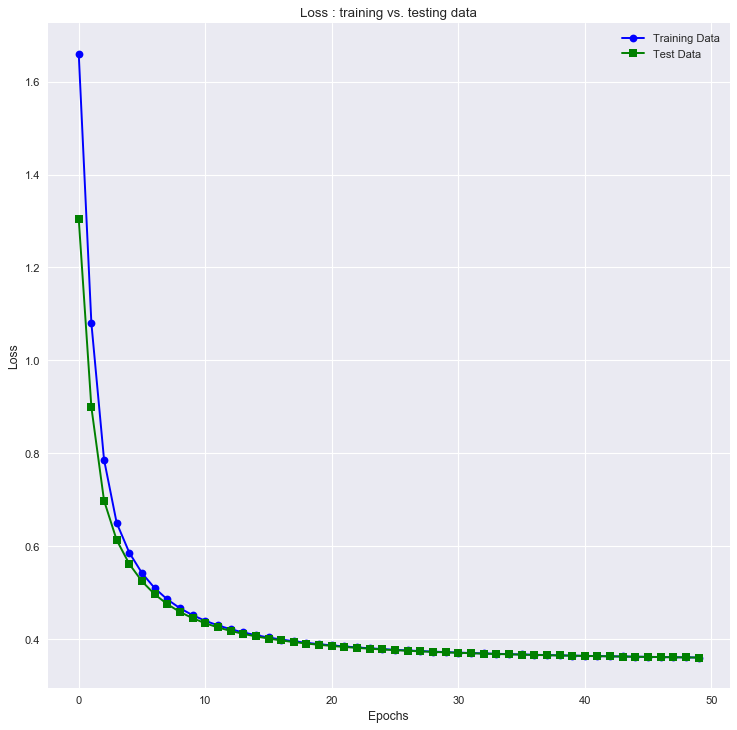

In [28]:
decayRate = learningRate / epochs

DNN_model = buildModel_DNN(dropout_rate=dropout_rate, decay_rate=decayRate)
history_fash = DNN_model.fit(trainImages, trainLabels_one_hot, epochs=epochs, batch_size=batchSize, validation_data=(testImages, testLabels_one_hot))
scores = DNN_model.evaluate(testImages, testLabels_one_hot, verbose=False)

plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(history_fash.history['acc'], 'bo-', label = 'Training Data')
plt.plot(history_fash.history['val_acc'], 'gs-', label = 'Test Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy : training vs. testing data')
plt.legend()
plt.show()

plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(history_fash.history['loss'], 'bo-', label = 'Training Data')
plt.plot(history_fash.history['val_loss'], 'gs-', label = 'Test Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss : training vs. testing data')
plt.legend()
plt.show()

# Decay stepsize with power elements using callbacks with dropout 0.2

In [29]:
epochs = 50
learningRate = 1e-1
momentum = 0.0
batchSize = 100

def stepDecay(epoch):
    initial_lrate = learningRate
    drop = 0.5
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate


class LossHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs=None):
        self.losses = []
        self.lr = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))
        self.lr.append(stepDecay(len(self.losses)))


loss_history = LossHistory()
l_rate = LearningRateScheduler(stepDecay)
callbackList = [loss_history, l_rate]



DNN_model_stepDecay = Sequential([Flatten(input_shape=(28, 28)),
                                  Dense(50, activation = tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)),
                                  Dropout(0.2),
                                  Dense(50, activation = tf.nn.relu, kernel_regularizer=regularizers.l2(0.001)),
                                  Dropout(0.2),
                                  Dense(10, activation = tf.nn.softmax, kernel_regularizer=regularizers.l1(0.01))
    ])
    
DNN_optimizer = optimizers.SGD(lr=learningRate, momentum=momentum, nesterov=True, decay=0.0)
    
DNN_model_stepDecay.compile(loss='binary_crossentropy', optimizer=DNN_optimizer, metrics=['accuracy', 'mean_squared_error'])
    
history_fash = DNN_model_stepDecay.fit(trainImages, trainLabels_one_hot, epochs=epochs, batch_size=batchSize, validation_data=(testImages, testLabels_one_hot), callbacks=callbackList, verbose=2)
scores = DNN_model_stepDecay.evaluate(testImages, testLabels_one_hot, verbose=False)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 0.8619 - acc: 0.9000 - mean_squared_error: 0.0836 - val_loss: 0.4442 - val_acc: 0.9000 - val_mean_squared_error: 0.0811
Epoch 2/50
 - 2s - loss: 0.3867 - acc: 0.9004 - mean_squared_error: 0.0808 - val_loss: 0.3443 - val_acc: 0.9000 - val_mean_squared_error: 0.0772
Epoch 3/50
 - 2s - loss: 0.3434 - acc: 0.9031 - mean_squared_error: 0.0780 - val_loss: 0.3236 - val_acc: 0.9023 - val_mean_squared_error: 0.0738
Epoch 4/50
 - 2s - loss: 0.3308 - acc: 0.9066 - mean_squared_error: 0.0755 - val_loss: 0.3127 - val_acc: 0.9071 - val_mean_squared_error: 0.0712
Epoch 5/50
 - 2s - loss: 0.3235 - acc: 0.9084 - mean_squared_error: 0.0743 - val_loss: 0.3075 - val_acc: 0.9074 - val_mean_squared_error: 0.0704
Epoch 6/50
 - 2s - loss: 0.3206 - acc: 0.9089 - mean_squared_error: 0.0738 - val_loss: 0.3042 - val_acc: 0.9082 - val_mean_squared_error: 0.0698
Epoch 7/50
 - 2s - loss: 0.3179 - acc: 0.9094 - mean_squared_error: 0.0734 - val

###### Print values returned by history variable

In [30]:
print(history_fash.history.keys(), '\n\n')

dict_keys(['val_loss', 'val_acc', 'val_mean_squared_error', 'loss', 'acc', 'mean_squared_error', 'lr']) 




###### Plot the decay stepsize results

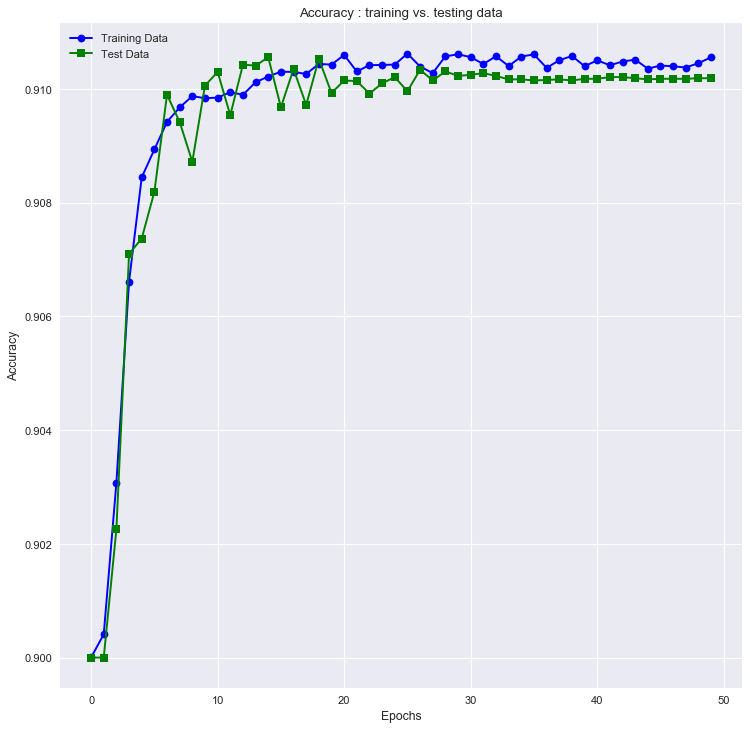

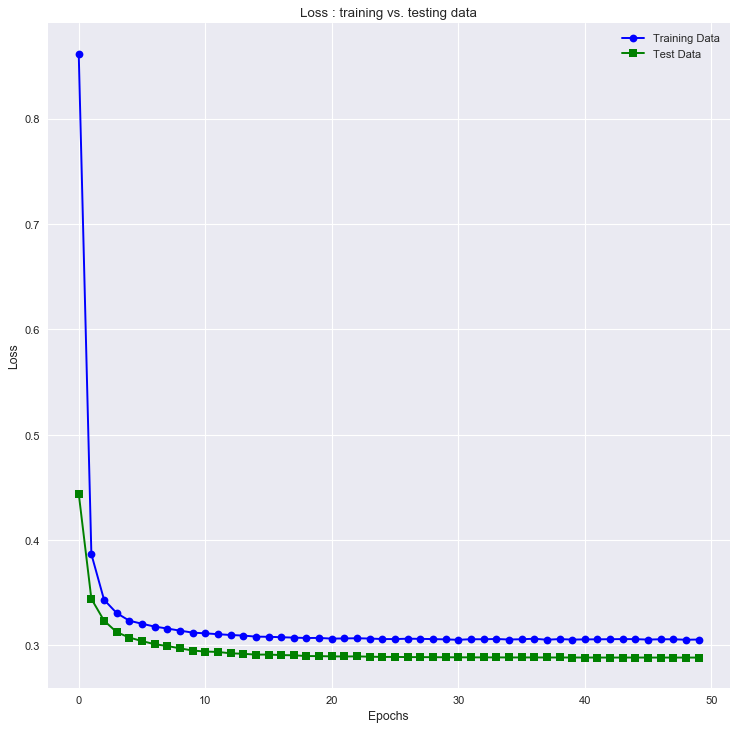

In [31]:


plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(history_fash.history['acc'], 'bo-', label = 'Training Data')
plt.plot(history_fash.history['val_acc'], 'gs-', label = 'Test Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy : training vs. testing data')
plt.legend()
plt.show()

plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(history_fash.history['loss'], 'bo-', label = 'Training Data')
plt.plot(history_fash.history['val_loss'], 'gs-', label = 'Test Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss : training vs. testing data')
plt.legend()
plt.show()

###### Plot the decay of the learning rate

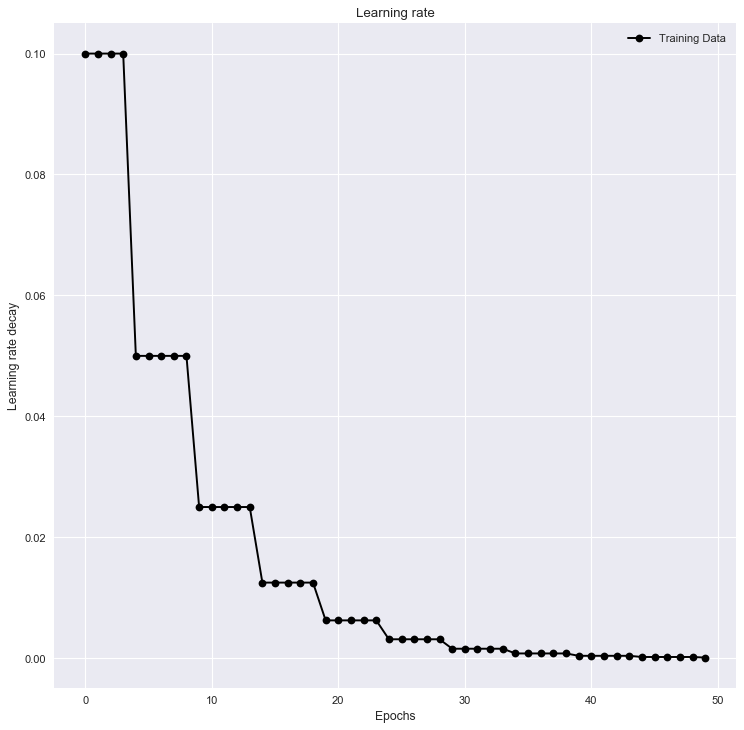

In [32]:
plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(history_fash.history['lr'], 'ko-', label = 'Training Data')
plt.xlabel('Epochs')
plt.ylabel('Learning rate decay')
plt.title('Learning rate')
plt.legend()
plt.show()

# Exponential decay using callbacks with dropout 0.2

In [33]:
epochs = 50
learningRate = 1e-1
momentum = 0.0
batchSize = 100

def expDecay(epoch):
    initial_lrate = learningRate
    k = 0.1
    lrate = initial_lrate * np.exp(-k * epoch)
    return lrate


class LossHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs=None):
        self.losses = []
        self.lr = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))
        self.lr.append(expDecay(len(self.losses)))


loss_history = LossHistory()
l_rate = LearningRateScheduler(expDecay)
callbackList = [loss_history, l_rate]



DNN_model_stepDecay = Sequential([Flatten(input_shape=(28, 28)),
                                  Dense(50, activation = tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)),
                                  Dropout(0.2),
                                  Dense(50, activation = tf.nn.relu, kernel_regularizer=regularizers.l2(0.001)),
                                  Dropout(0.2),
                                  Dense(10, activation = tf.nn.softmax, kernel_regularizer=regularizers.l1(0.01))
    ])
    
DNN_optimizer = optimizers.SGD(lr=learningRate, momentum=momentum, nesterov=True, decay=0.0)
    
DNN_model_stepDecay.compile(loss='binary_crossentropy', optimizer=DNN_optimizer, metrics=['accuracy', 'mean_squared_error'])
    
history_fash = DNN_model_stepDecay.fit(trainImages, trainLabels_one_hot, epochs=epochs, batch_size=batchSize, validation_data=(testImages, testLabels_one_hot), callbacks=callbackList, verbose=2)
scores = DNN_model_stepDecay.evaluate(testImages, testLabels_one_hot, verbose=False)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 3s - loss: 0.8658 - acc: 0.9007 - mean_squared_error: 0.0812 - val_loss: 0.4446 - val_acc: 0.9006 - val_mean_squared_error: 0.0778
Epoch 2/50
 - 2s - loss: 0.3877 - acc: 0.9062 - mean_squared_error: 0.0756 - val_loss: 0.3439 - val_acc: 0.9102 - val_mean_squared_error: 0.0705
Epoch 3/50
 - 2s - loss: 0.3427 - acc: 0.9110 - mean_squared_error: 0.0721 - val_loss: 0.3234 - val_acc: 0.9119 - val_mean_squared_error: 0.0682
Epoch 4/50
 - 2s - loss: 0.3307 - acc: 0.9126 - mean_squared_error: 0.0707 - val_loss: 0.3136 - val_acc: 0.9141 - val_mean_squared_error: 0.0664
Epoch 5/50
 - 2s - loss: 0.3242 - acc: 0.9133 - mean_squared_error: 0.0697 - val_loss: 0.3075 - val_acc: 0.9133 - val_mean_squared_error: 0.0655
Epoch 6/50
 - 2s - loss: 0.3198 - acc: 0.9132 - mean_squared_error: 0.0692 - val_loss: 0.3035 - val_acc: 0.9138 - val_mean_squared_error: 0.0651
Epoch 7/50
 - 2s - loss: 0.3165 - acc: 0.9137 - mean_squared_error: 0.0688 - val

###### Print values returned by history variable

In [34]:
print(history_fash.history.keys(), '\n\n')

dict_keys(['val_loss', 'val_acc', 'val_mean_squared_error', 'loss', 'acc', 'mean_squared_error', 'lr']) 




###### Plot the decay stepsize results

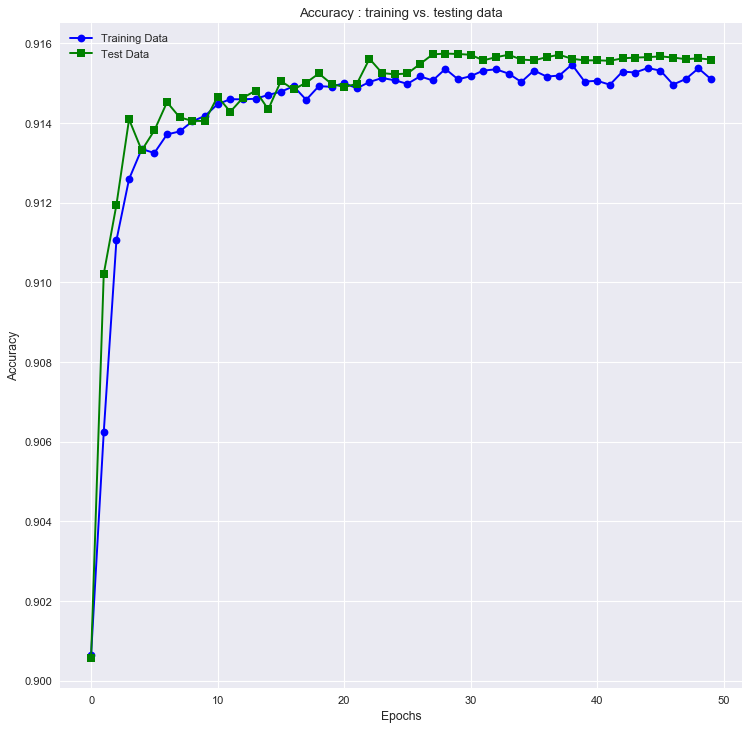

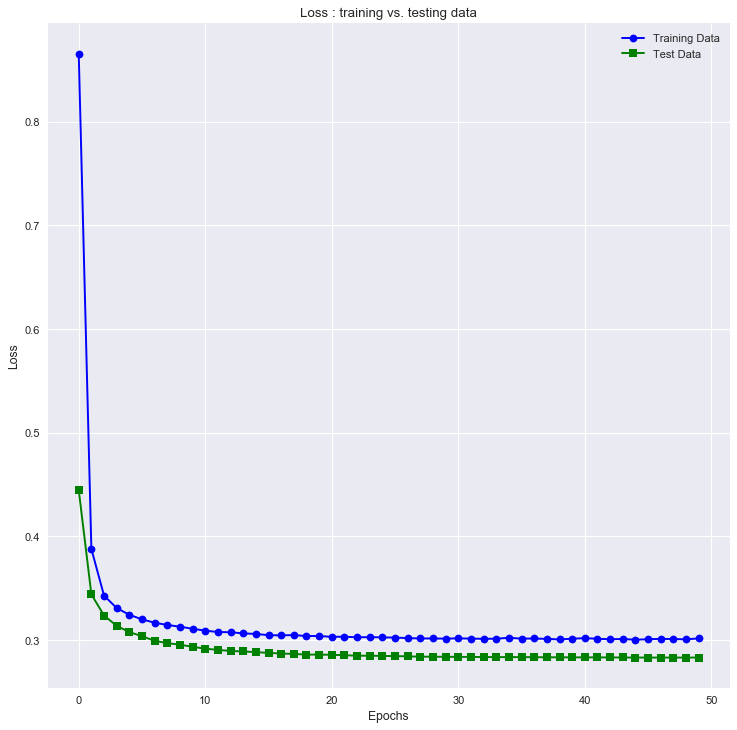

In [35]:
plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(history_fash.history['acc'], 'bo-', label = 'Training Data')
plt.plot(history_fash.history['val_acc'], 'gs-', label = 'Test Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy : training vs. testing data')
plt.legend()
plt.show()

plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(history_fash.history['loss'], 'bo-', label = 'Training Data')
plt.plot(history_fash.history['val_loss'], 'gs-', label = 'Test Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss : training vs. testing data')
plt.legend()
plt.show()

###### Plot the decay learning rate

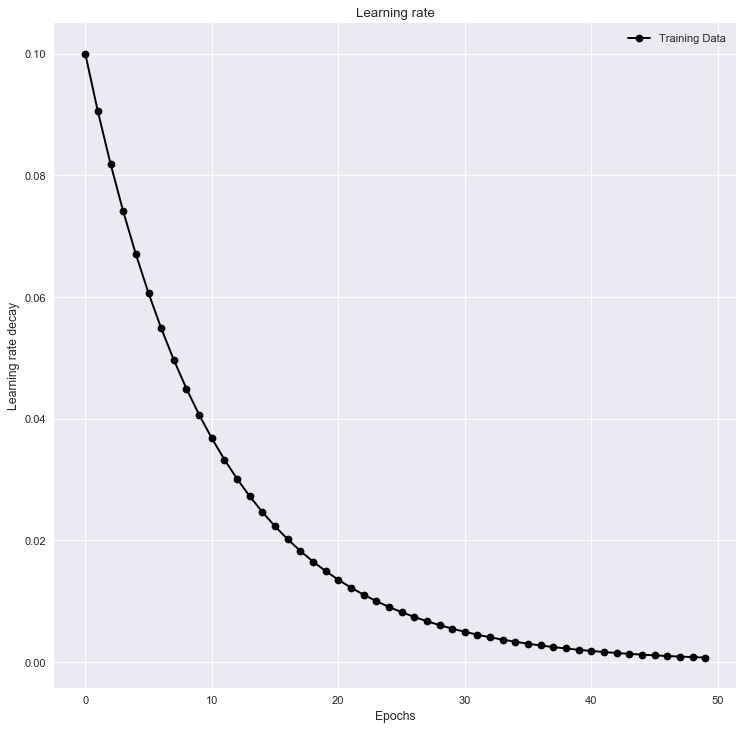

In [36]:
plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(history_fash.history['lr'], 'ko-', label = 'Training Data')
plt.xlabel('Epochs')
plt.ylabel('Learning rate decay')
plt.title('Learning rate')
plt.legend()
plt.show()

# DNN model with early stopping using callbacks with dropout rate 0.1

In [39]:
learningRate = 1e-2
earlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

DNN_model = buildModel_DNN(dropout_rate=0.1, decay_rate=0.0)
history_fash = DNN_model.fit(trainImages, trainLabels_one_hot, epochs=epochs, batch_size=batchSize, validation_data=(testImages, testLabels_one_hot), callbacks=[earlyStop])

print('\n\n', history_fash.history.keys(), '\n\n')


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 47us/step - loss: 1.8814 - acc: 0.9000 - mean_squared_error: 0.0872 - val_loss: 1.6352 - val_acc: 0.9000 - val_mean_squared_error: 0.0831
Epoch 2/50
60000/60000 [==============================] - 3s 44us/step - loss: 1.4358 - acc: 0.9000 - mean_squared_error: 0.0811 - val_loss: 1.2504 - val_acc: 0.9000 - val_mean_squared_error: 0.0787
Epoch 3/50
60000/60000 [==============================] - 3s 45us/step - loss: 1.1067 - acc: 0.9004 - mean_squared_error: 0.0782 - val_loss: 0.9746 - val_acc: 0.9001 - val_mean_squared_error: 0.0771
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.8771 - acc: 0.9013 - mean_squared_error: 0.0776 - val_loss: 0.7876 - val_acc: 0.9006 - val_mean_squared_error: 0.0773
Epoch 5/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.7257 - acc: 0.9018 - mean_squared_error: 0.0781 - val_loss: 0.6691 - val_

Epoch 42/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3022 - acc: 0.9255 - mean_squared_error: 0.0579 - val_loss: 0.2893 - val_acc: 0.9277 - val_mean_squared_error: 0.0544
Epoch 43/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.3011 - acc: 0.9262 - mean_squared_error: 0.0576 - val_loss: 0.2884 - val_acc: 0.9276 - val_mean_squared_error: 0.0543
Epoch 44/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.3000 - acc: 0.9262 - mean_squared_error: 0.0573 - val_loss: 0.2875 - val_acc: 0.9283 - val_mean_squared_error: 0.0539
Epoch 45/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2996 - acc: 0.9266 - mean_squared_error: 0.0572 - val_loss: 0.2866 - val_acc: 0.9284 - val_mean_squared_error: 0.0538
Epoch 46/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2993 - acc: 0.9266 - mean_squared_error: 0.0572 - val_loss: 0.2861 - val_acc: 0.9284 - val_mean_squared_error: 0.0537


###### Plot of the MSE of the early stopping procedure

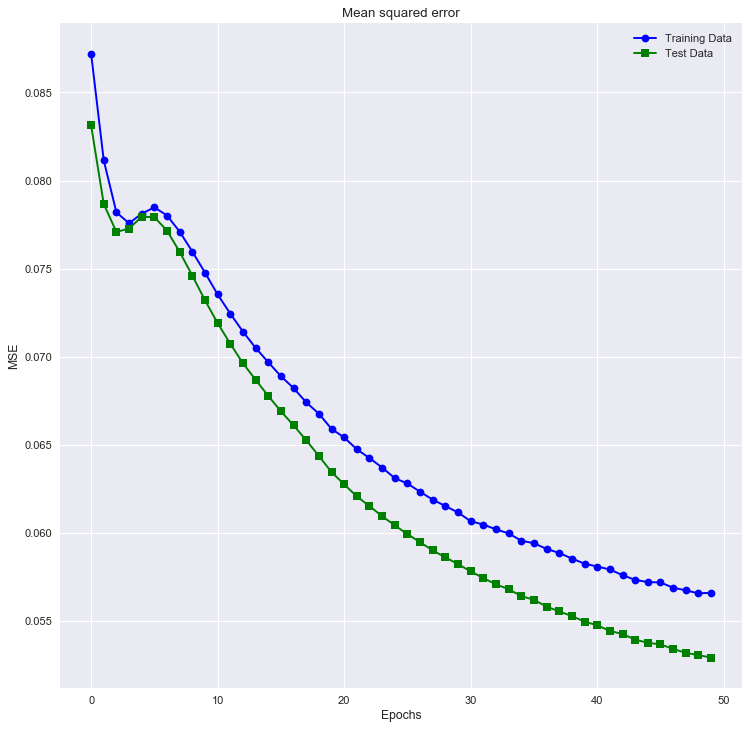

In [40]:
plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(history_fash.history['mean_squared_error'], 'bo-', label = 'Training Data')
plt.plot(history_fash.history['val_mean_squared_error'], 'gs-', label = 'Test Data')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Mean squared error')
plt.legend()
plt.show()